In [1]:
import propagators
import energy_landscapes
import long_simulation
import weighted_ensemble
import weighted_ensemble_2
import numpy as np

kT = 1
dt = 0.001
system1 = energy_landscapes.unit_double_well()


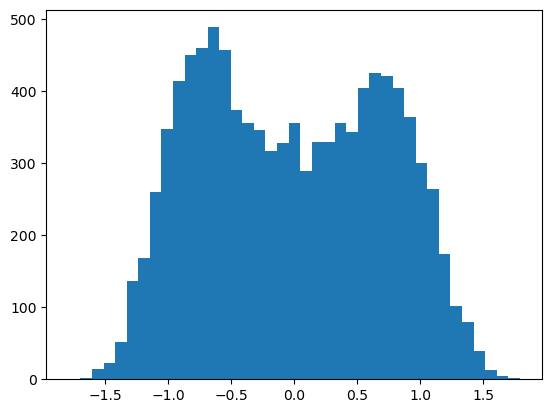

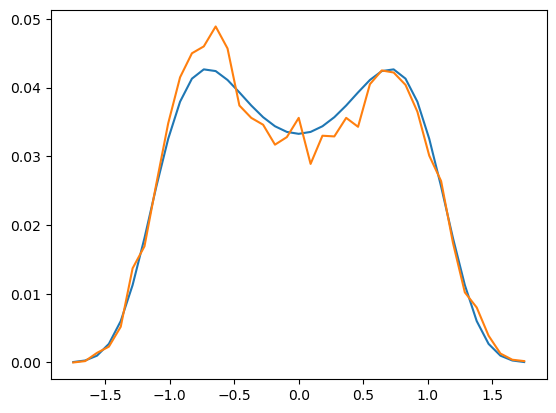

kl divergence = inf
weighted RMSE = 0.0004461885445292321
simulation steps:
 Aggregate: 100000 
 Molecular: 10000


/home/jonathan/Documents/grabelab/sampling-scheme-development/sampling-methods/long_simulation.py:48: RuntimeWarning: divide by zero encountered in scalar divide
  kl_divergence = sum([epa*np.log(epa/eps) for epa, eps in zip(eq_pops_analytic, eq_pops_simulation)])


In [2]:
#system1.plot_quantity(system1.potential)
x_init_coord = -1/np.sqrt(2)
nsteps = 10000
save_period = 10 #in steps
n_parallel = 10
nbins = 40

xd, ed, rp = long_simulation.recover_energy_landscape(propagators.propagate_nd, system1, kT, x_init_coord, dt, nsteps, save_period, n_parallel, nbins)

print(f"simulation steps:\n Aggregate: {nsteps*n_parallel} \n Molecular: {nsteps}")


Each bin can hold up to 2 walkers, for a total of up to 84 walkers
0
10
20
30
40
50
60
70
80
90


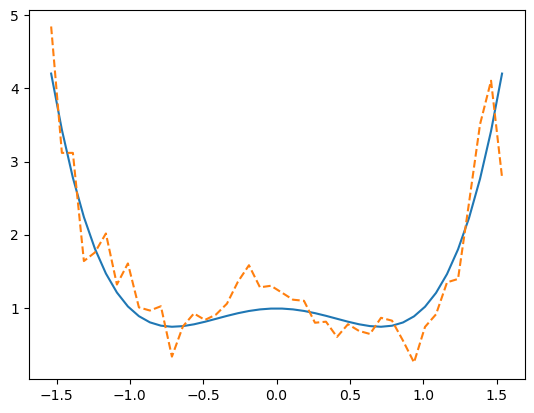

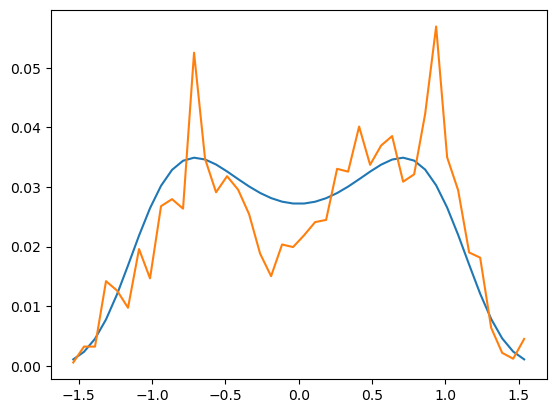

kl divergence = 0.042231477973096086
weighted RMSE = 0.0012500426192780423
simulation steps:
 Aggregate: 941600 
 Molecular: 20000


In [3]:
#Weighted ensemble (WE) parameters and inputs

N = 80             #total number of walkers within binrange
nbins = 40         #total number of bins within binrange
binrange = [-1.5,1.5] #progress coordinate range within which to bin simulations
                    #this should extend well past the stall point for examination of the WE stall force
                    #the area past either end of binrange is a bin extending to either + or - inf, yielding a total of nbins+2 bins
n_macrostates=2
        
nsteps = 200        #round length
nrounds = 100        #number of WE rounds to run

walkers_per_bin = round(N/nbins)
print(f"Each bin can hold up to {walkers_per_bin} walkers, for a total of up to {walkers_per_bin*(nbins+2)} walkers")

#start 1 bin worth of walkers at x=0 with equal weights
x_init = np.array([-1/np.sqrt(2) for element in range(walkers_per_bin)])
w_init = [1/walkers_per_bin for element in range(walkers_per_bin)]

#run weighted ensemble with brownian dynamics
#put this on multiple lines
x_init, e_init, w_init, binbounds, xtrj, etrj, wtrj, transitions, hamsm_transitions, n_trans_by_round \
= weighted_ensemble.weighted_ensemble(\
                    x_init,\
                    w_init,\
                    nrounds,\
                    nbins,\
                    walkers_per_bin,\
                    binrange, propagators.propagate_nd_save1,\
                    [system1, kT, dt, nsteps],\
                    system1.macro_class,\
                    n_macrostates,\
                    ha_binning=False)


weighted_ensemble.landscape_recovery(xtrj, wtrj, binbounds, transitions, hamsm_transitions, n_trans_by_round, nrounds, n_macrostates, system1.potential, system1.macro_class, kT)

aggregate_walkers = len([j for i in xtrj for j in i])
print(f"simulation steps:\n Aggregate: {nsteps*aggregate_walkers} \n Molecular: {nsteps*nrounds}")


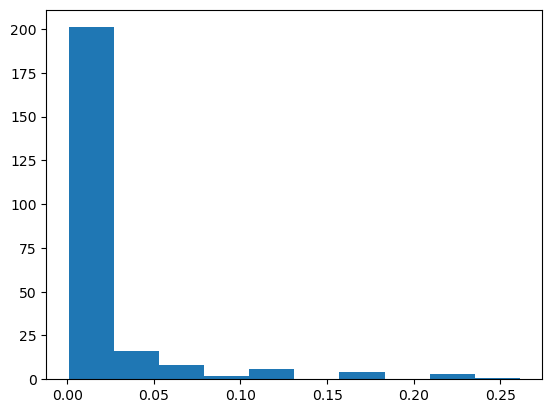

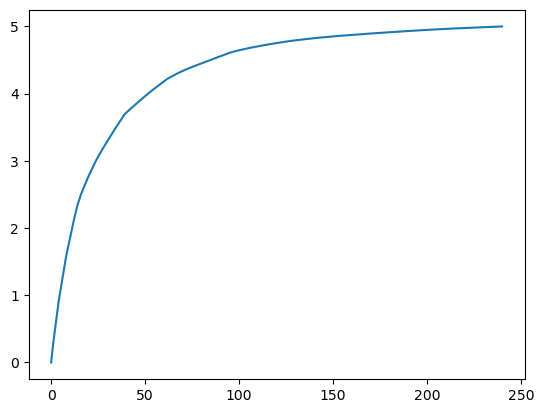

In [4]:
w_trj_flat = [j for i in wtrj[-5:] for j in i]
import matplotlib.pyplot as plt
plt.hist(w_trj_flat)
plt.show()

a = sorted(w_trj_flat)
a.reverse()

plt.plot([sum(a[0:i]) for i in range(len(a))])
#more aggressive methods are needed to keep walker weights in a reasonable range

Each bin can hold up to 6 walkers, for a total of up to 252 walkers
0
10
20
30
40
50
60
70
80
90


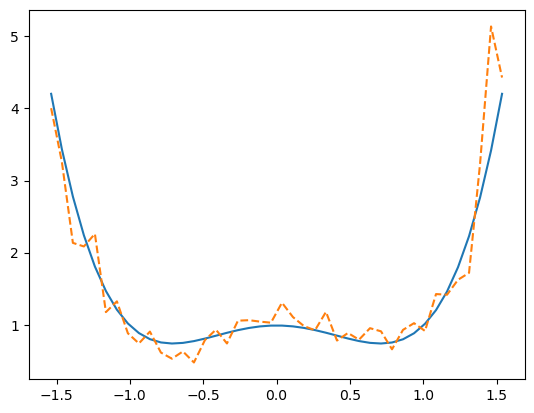

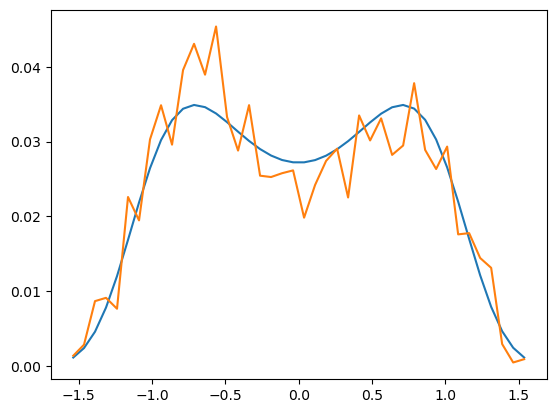

kl divergence = 0.017447876424771882
weighted RMSE = 0.0007104832394640945
simulation steps:
 Aggregate: 1027800 
 Molecular: 20000


In [5]:
#Weighted ensemble (WE) parameters and inputs

N = 240             #total number of walkers within binrange
nbins = 40         #total number of bins within binrange

walkers_per_bin = round(N/nbins)
print(f"Each bin can hold up to {walkers_per_bin} walkers, for a total of up to {walkers_per_bin*(nbins+2)} walkers")

binrange = [-1.5,1.5] #progress coordinate range within which to bin simulations
                    #this should extend well past the stall point for examination of the WE stall force
                    #the area past either end of binrange is a bin extending to either + or - inf, yielding a total of nbins+2 bins
n_macrostates=2
        
nsteps = 200        #round length
nrounds = 100        #number of WE rounds to run

x_init_val = -1/np.sqrt(2)

#run weighted ensemble with brownian dynamics
#put this on multiple lines
x_init, e_init, w_init, binbounds, xtrj, etrj, wtrj, transitions, hamsm_transitions, n_trans_by_round \
= weighted_ensemble_2.weighted_ensemble_start(\
                    x_init_val,\
                    nrounds,\
                    nbins,\
                    walkers_per_bin,\
                    binrange, propagators.propagate_nd_save1,\
                    [system1, kT, dt, nsteps],\
                    system1.macro_class,\
                    n_macrostates,\
                    ha_binning=False)


weighted_ensemble.landscape_recovery(xtrj, wtrj, binbounds, transitions, hamsm_transitions, n_trans_by_round, nrounds, n_macrostates, system1.potential, system1.macro_class, kT)

aggregate_walkers = len([j for i in xtrj for j in i])
print(f"simulation steps:\n Aggregate: {nsteps*aggregate_walkers} \n Molecular: {nsteps*nrounds}")


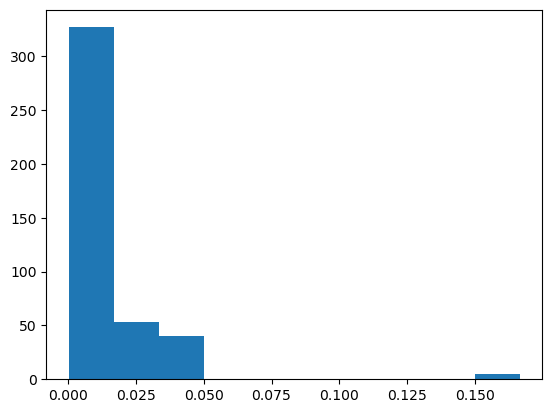

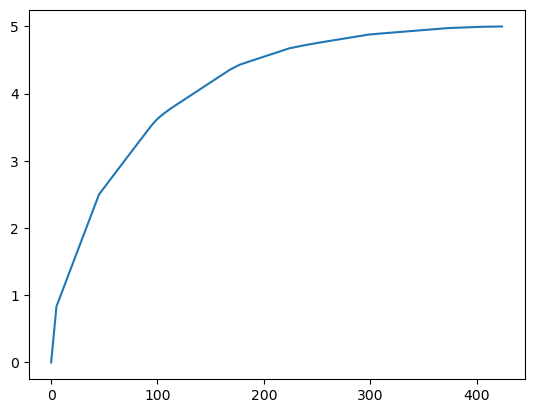

In [6]:
w_trj_flat = [j for i in wtrj[-5:] for j in i]

import matplotlib.pyplot as plt
plt.hist(w_trj_flat)
plt.show()

a = sorted(w_trj_flat)
a.reverse()

plt.plot([sum(a[0:i]) for i in range(len(a))])

In [7]:
sum(wtrj[-1])

0.9999999999999998